In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [91]:

data_well = pd.read_csv('/DATA/well1.csv')
data_well = data_well.dropna(how='any')
data_well

,DEPTH,RHOB,DT,GR,FACIES
1427,262.0500,1998.9065,513.5145,20.8059,1
1428,262.2000,1989.1794,513.5073,21.1575,1
1429,262.3500,1985.5889,513.4998,21.3494,1
1430,262.5000,2008.2076,513.4924,21.1685,1
1431,262.6500,2026.0713,513.4849,21.1536,1
...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,1
9676,1499.4000,1814.1691,534.8610,28.5281,1
9677,1499.5500,1861.6497,537.1902,28.5813,1
9678,1499.7001,1880.3978,537.2630,28.5813,1


In [92]:
x_train = data_well.iloc[:,1:4].values
x_train

array([[1998.9065,  513.5145,   20.8059],
       [1989.1794,  513.5073,   21.1575],
       [1985.5889,  513.4998,   21.3494],
       ...,
       [1861.6497,  537.1902,   28.5813],
       [1880.3978,  537.263 ,   28.5813],
       [1856.335 ,  537.3831,   27.9759]])

In [93]:
y_train = data_well.iloc[:,-1].values
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [94]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [95]:
log_predict = model.predict(x_train)
print(classification_report(y_train, log_predict))

              precision    recall  f1-score   support

           1       0.91      0.90      0.90      2678
           2       0.95      0.83      0.89       500
           3       0.94      0.96      0.95      4795
           4       0.88      0.75      0.81       280

    accuracy                           0.93      8253
   macro avg       0.92      0.86      0.89      8253
weighted avg       0.93      0.93      0.93      8253



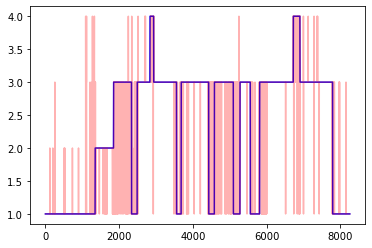

In [96]:
plt.plot(y_train, 'b')
plt.plot(log_predict, 'r', alpha=0.3)
plt.show()

In [97]:
data_plot = data_well.copy()
data_plot['FACIES PRED'] = log_predict
data_plot

,DEPTH,RHOB,DT,GR,FACIES,FACIES PRED
1427,262.0500,1998.9065,513.5145,20.8059,1,1
1428,262.2000,1989.1794,513.5073,21.1575,1,1
1429,262.3500,1985.5889,513.4998,21.3494,1,1
1430,262.5000,2008.2076,513.4924,21.1685,1,1
1431,262.6500,2026.0713,513.4849,21.1536,1,1
...,...,...,...,...,...,...
9675,1499.2500,1787.5444,532.1727,27.6273,1,1
9676,1499.4000,1814.1691,534.8610,28.5281,1,1
9677,1499.5500,1861.6497,537.1902,28.5813,1,1
9678,1499.7001,1880.3978,537.2630,28.5813,1,1


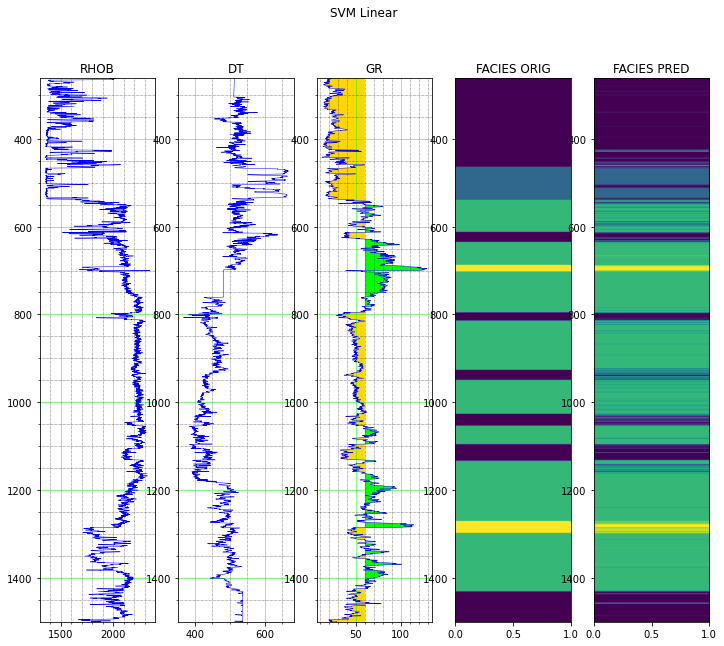

In [101]:
data = data_plot.values
columns = ['RHOB','DT','GR','FACIES ORIG','FACIES PRED']
rows, cols = 1,5
fig, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(12,10))
for i in range(cols):
    if i < cols - 2:
        ax[i].plot(data[:,i+1],data[:,0],linewidth='0.5', color='b')
        ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
        ax[i].set_title(f'{columns[i]}')
        ax[i].minorticks_on()
        ax[i].grid(which='major',linestyle='-',linewidth='0.5',color='lime')
        ax[i].grid(which='minor',linestyle=':',linewidth='0.5',color='black')
    elif i==cols-2:
        F = np.vstack((y_train,y_train)).T
        ax[i].imshow(F, aspect='auto',extent=[0,1,max(data[:,0]), min(data[:,0])])
        ax[i].set_title(f'{columns[i]}')
    elif i==cols-1:
        F = np.vstack((log_predict,log_predict)).T
        ax[i].imshow(F, aspect='auto',extent=[0,1,max(data[:,0]), min(data[:,0])])
        ax[i].set_title(f'{columns[i]}')
    

y2 = data[:,3]
y1 = y2*0+60
ax[2].fill_betweenx(data[:,0],y1,y2,where=(y1>=y2), color='gold', linewidth=0)
ax[2].fill_betweenx(data[:,0],y1,y2,where=(y1<y2),color='lime',linewidth=0)
plt.suptitle('SVM Linear')
plt.show()